# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Projeto 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: **

O problema em questão, para esse conjunto de dados, é de classificação. 

Ao observarmos os dados, a coluna ou alvo da resposta é algo categórico (SIM/NÂO). Com isso, temos uma resposta discreta e não contínua. Esse ponto evidencia que, identificar os estudantes que poderão sofrer uma intervenção antes de serem reprovados, é um problema de classificação.

## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [1]:
# Importar bibliotecas

import numpy as np
import pandas as pd
from time import time

from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

#import missingno as msno
import gc

import pandas as pd
from time import time
import numpy as np
import seaborn as sns

# Ler os dados dos estudantes
student_data = pd.read_csv(r"C:\Users\Thiago Grabe\Desktop\Student-Intervention-System-master\Student-Intervention-System-master\student-data.csv")
print "Os dados dos estudantes foram lidos com êxito!"

#print (student_data)
print student_data.head (3)

print student_data.tail (3)


Os dados dos estudantes foram lidos com êxito!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher   
1     GP   F   17       U     GT3       T     1     1  at_home    other   
2     GP   F   15       U     LE3       T     1     1  at_home    other   

   ...   internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...         no       no       4         3      4    1    1      3        6   
1  ...        yes       no       5         3      3    1    1      3        4   
2  ...        yes       no       4         3      2    2    3      3       10   

  passed  
0     no  
1     no  
2    yes  

[3 rows x 31 columns]
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
392     MS   M   21       R     GT3       T     1     1     other    other   
393     MS   M   18       R     LE3       T     3     2  services    other   
394     MS   M   19       

In [2]:

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
pd.options.display.float_format = '{:.2f}'.format
rc={'savefig.dpi': 75, 
    'figure.autolayout': False, 
    'figure.figsize': [12, 8], 
    'axes.labelsize': 18,
    'axes.titlesize': 18,  
    'font.size': 18, 
    'lines.linewidth': 2.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 16,
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}

sns.set(style='dark',rc=rc)

#Color Map
default_color = '#56B4E9'
colormap = plt.cm.cool

### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


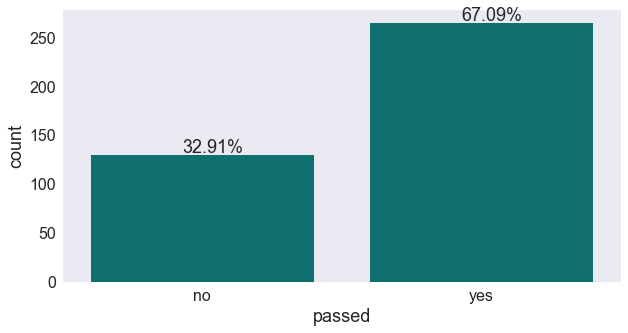

In [3]:
plt.figure(figsize=(10,5))

ax = sns.countplot('passed',data=student_data,color='teal')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(student_data['passed'])), (p.get_x()+ 0.33, p.get_height()+2))

In [4]:
#Binary = 0 or 1;
#Nominal = nominal data (names);
#Interval = Continuous variables;
#Ordinal  = Ordinal data (3 is bigger than 2 and 1 is lower than 5 for example);

def get_meta(student_data):
    data = []
    for col in student_data.columns:
        # Defining the role
        if col == 'passed':
            role = 'target'
        elif col == 'id':
            role = 'id'
        else:
            role = 'input'

        # Defining the level
        if student_data[col].dtype == np.int64:
            level = 'interval'
        elif student_data[col].dtype == np.float64:
            level = 'ordinal'

        # Initialize keep to True for all variables except for id
        keep = True
        if col == 'id':
            keep = False

        # Defining the data type 
        dtype = student_data[col].dtype

        # Creating a Dict that contains all the metadata for the variable
        col_dict = {
            'varname': col,
            'role'   : role,
            #'level' : level,
            'keep'   : keep,
            'dtype'  : dtype
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=['varname', 'role','keep','dtype'])
    meta.set_index('varname', inplace=True)
    return meta

In [5]:
meta_data = get_meta(student_data)
meta_data

,role,keep,dtype
varname,,,
school,input,True,object
sex,input,True,object
age,input,True,int64
address,input,True,object
famsize,input,True,object
Pstatus,input,True,object
Medu,input,True,int64
Fedu,input,True,int64
Mjob,input,True,object


In [6]:
# TODO: Calcule o número de estudante
n_students = student_data.shape[0]  
#or n_features = student_data.sum(0)??
             
           
# TODO: Calcule o número de atributos
n_features = len(student_data.columns)-1
#or n_features = student_data.sum(1)??

# TODO: Calcule o número de alunos aprovados
n_passed = (student_data['passed'].str[0] == 'y').sum()

# TODO: Calcule o número de alunos reprovados
n_failed = (student_data['passed'].str[0] == 'n').sum()

# TODO: Calcule a taxa de graduação
grad_rate = np.float32(n_passed)/np.float32(n_students) * 100


# Imprima os resultados
print "Número total de estudantes: {}".format(n_students)
print "Número de atributos: {}".format(n_features)
print "Número de estudantes aprovados: {}".format(n_passed)
print "Número de estudantes reprovados: {}".format(n_failed)
print "Taxa de graduação: {:.2f}%".format(grad_rate)



Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [9]:
# Extraia as colunas dos atributo
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo 'passed'
target_col = student_data.columns[-1] 

# Mostre a lista de colunas
print "Colunas de atributos:\n{}".format(feature_cols)
print "\nColuna-alvo: {}".format(target_col)

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print "\nFeature values:"
print X_all.head()

#print y_all
#Esse comando 'printa' as 5 primeiras colunas

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (_dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [10]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):

['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
         36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
         45.5,  46.5,  47.5,  48.5]), <a list of 49 Text yticklabel objects>)

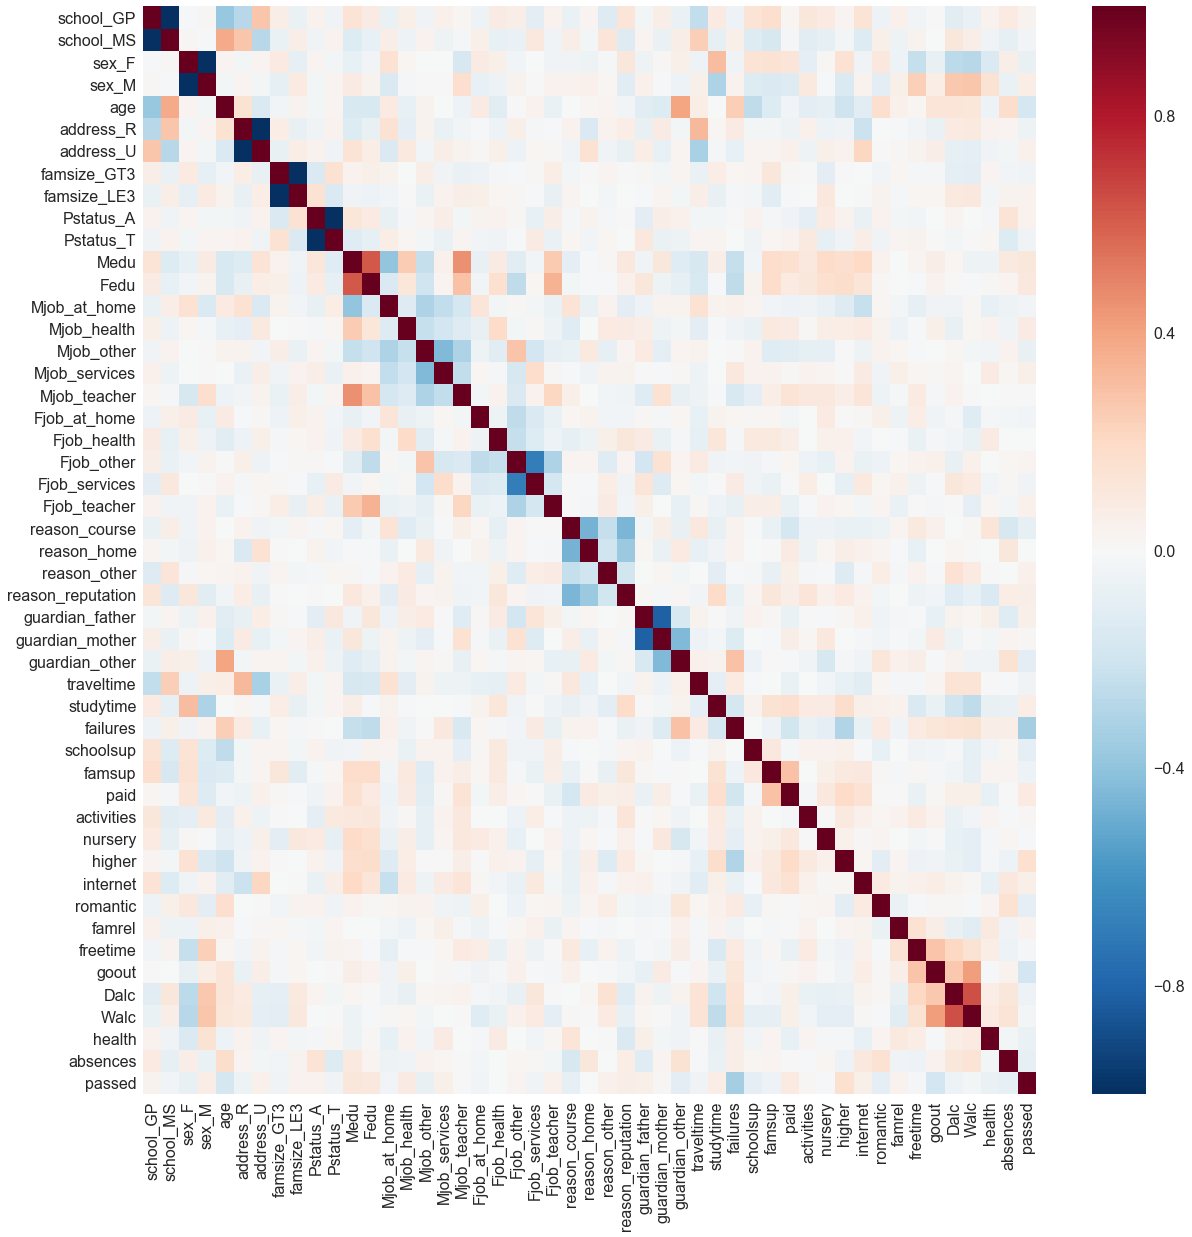

In [35]:
#Plotando um heatmap dos dados para análise de correlação entre alguma variável que seja explicitamente vista


Y_boolean = y_all.replace(['yes', 'no'], [1, 0])
y_hm = pd.concat((X_all, Y_boolean), axis=1)


#y_hm = np.concatenate ((X_all, y_all), axis = 1)

#print (y_hm)


plt.figure(figsize=(20,20))
sns.heatmap(y_hm.corr(),annot = False,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)


### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [28]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui

from sklearn.cross_validation import StratifiedShuffleSplit
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

from sklearn.cross_validation import train_test_split
#http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html

# TODO: Estabeleça o número de pontos de treinamento
num_train = 300

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, \
                                                    test_size = num_test, train_size = num_train, \
                                                    random_state=999)
'''
sss = StratifiedShuffleSplit(y_all,test_size=num_test, random_state=99)
        

for train_index, test_index in sfss:
      X_train , y_train = X_all.iloc[train_index] , y_all.iloc[train_index]
  
      X_test , y_test = X_all.iloc[test_index] , y_all.iloc[test_index]
'''

# Mostre o resultado da distribuição
print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


c:\programdata\anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

**Resposta: **

** Máquinas de vetores de suporte (SVM) **

*Introdução*

As Máquinas de Vetores de Suporte (SVMs, do Inglês Support Vector Machines) constituem uma técnica de aprendizado proveniente da Teoria do Aprendizado Estatístico, a qual está baseada no fato de que o erro da técnica de aprendizagem junto aos dados de validação (erro de generalização) é limitado pelo erro de treinamento mais um termo que depende da dimensão. Os resultados da aplicação dessa técnica são comparáveis e muitas vezes superiores aos obtidos por outros algoritmos de aprendizado, como as Redes Neurais Artificiais (RNAs). 

SVM implementa um mapeamento não-linear (executado por um produto interno kernel escolhido a priori) dos dados de entrada para um espaço de características (feature space) de alta-dimensão, em que um hiperplano ótimo é construído para separar os dados linearmente em duas classes. 

Quando os dados de treinamento são separáveis, o hiperplano ótimo no espaço de características é aquele que apresenta a máxima margem de separação ρ. Em suma, o algoritmo busca o hiperplano que tenha a distânica máxima entre os pontos próximos à margem de separação conforme figura abaixo. Ao maximizar a margem, a classificação ou predição terá menos chance de *overfitting*.

Esse modelo é um bom candidato para o problema por apresentar uma ótima característica de classificação através do mapeamento não-linear e a construção de um hiperplano que pode separar bem os dados. Como os dados não apresentam uma correlação clara, deixar com o que o algoritmo de SVM trabalhe em dimensões maiores para classificar os dados pode apresentar bons resultados. Uma das desvantagens (aboradada mais a frente) do SVM é o tempo de treinamento ser alto. Contudo, temos um *dataset* pequeno com 395 linhas de dados ou, 395 pontos. Isso torna o SVM uma opção viável para ganho de computação nessa classificação. Além disso, não sabemos se os nossos dados são linearmente separáveis ou não. Com isso, SVM por ser flexível através do *Kernel trick*, pode-se obter classificadores não lineares com razoável facilidade.

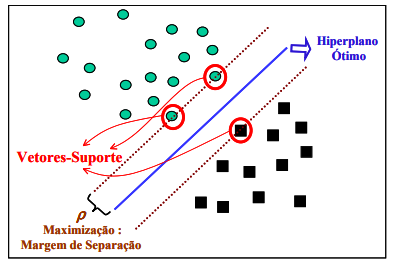

In [37]:
from IPython.display import Image
Image(filename='Imagem SVM.PNG')

Exemplos de aplicações de sucesso podem ser encontrados em diversos domínios, como na categorização de textos, na análise de imagens e em Bioinformática. Além disso, SVM é utilizado para predição de falhas em componentes mecânicos como rolamentos e engrenagens.

*Vantagens*

SVM apresenta robustez em dados com diversos atributos ou objetos de grandes dimensões como imagens. Além disso, possui uma teoria bem definida dentro da matemática e estatística.

*Desvantagens*

Pode ocorrer levar bastante tempo para treinar o classificador dependendo da complexidade dos dados/problema. Outro ponto de atenção é que se faz necessário uma boa definição do *Kernel* utilizado.

** K-Nearest Neighbors (KNeighbors)**

*Introdução*

Utilizado tanto no aprendizado supervisionado quanto o não supervisionado, o método *K-Nearest Neighbors* pode ser utilizado tanto para classificação para dados discretos e regressão para dados contínuos. Em síntese, o método consiste em procurar os pontos próximos a um novo ponto e assim predizer/classificar. A distância entre esses pontos pode ser determinada por diversos métodos sendo o método euclidiano o mais comum. 

Por mais simples que seja, *K-Nearest Neighbors* apresenta ótimos resultados na classificação e regressão de problemas como monitoramento da camada de ozônio e até mesmo a logística de um sistema agricultor. Além disso, sistemas de recomendação podem usar essa técnica.

Esse método além de ser indicado para classificação, pode apresentar bons resultados por olhar os pontos vizinhos. Caso os dados sigam uma tendência clara, este método pode ter um bom *score* ao tratar os dados.

No caso específico do problema de classificação, se o aluno precisa ou não de intervenção, *K-Nearest Neighbors* pode ser aplicado devido ao fato de termos atributos binários **[0 , 1]**.  Com isso, o dados estão na mesma escala facilitando a percepção do algortimo para as distâncias entre os vizinhos. Além disso, como *KNN* olha a frequência de cada atributo para calcular a distância ao vizinho, uma classificação binária tende a facilitar essa avaliação. Logo, ao se pensar nesse problema de classificação, há um tendência de um certo grupo de alunos manterem um padrão. Essa padronização de alguns atributos favorece a utilização do *K-Nearest Neighbors* como classificador.

*Vantagens*

*K-Nearest Neighbors* possui algumas vantagens como o desempenho em grandes grupos de dados, simples de implementar além de ser flexível por atuar tanto com regressão quanto classificação. Pode-se ainda citar que conceitos complexos podem ser interpretados localmente por aproximação. 

*Desvantagens*

As desvantagens desse método são a determinação do parâmetro *k* dos vizinhos próximos além da função distância entre os pontos vizinhos quando a massa de dados é muito grande.

**Árvores de Decisão**

*Introdução*

Árvores de decisão (DTs) são um método de aprendizado de máquinas supervisionado para regressão e classificação. O objetivo é criar um modelo que prediz/classifica o valor de uma variável pelo aprendizado inferido sobre decisões.

No caso da classificação, as árvores de decisão são representadas por instâncias de "if-then" ou "se-então" que resultam em um resultado classificatório dos dados e, consequentemente, a uma decisão final.

Algumas observações importantes sobre as DTs são que elas tendem a ter sobreajuste em grandes quantidades de atributos. Existem algoritmos para DTs como o ID3, C4.5, C5.0 e CART.

Para o problema da intervençaõ em estudantes, o método de árovre de decisão pode ser bem determinístico e causar *overfitting*. Mesmo assim, esse método pode ser extremamente eficaz e capaz de inferir decisões sobre os dados, e assim trazer bons resultados de *score*, caso os dados estejam bem uniformes. Por se tratar de uma classificação binária, *precisa ou não precisa de intervenção* DTs seriam extremamente úteis, além disso pode ser facilmente visualizada por uma audiência não técnica e assim o público alvo teria uma visão de cada ramo da árvore entendendo passo a passo como a classificação se deu. Essa capacidade de fácil interpretação por pessoas não técnicas da área de *Data Science* que são "tomadores de decisão" pode se bem apreciada caso haja um *score* satisfatório.

*Vantagens*

São simples de entender e representar, além de serem versáteis no sentido de se poder utilizar dados numéricos e categóricos. É possível ainda validar por métodos estatísticos os modelos.

*Desvantagens*

Podem gerar árvores bastante complexas caso alguns cuidados não sejam tomados. Conjuntos de dados desbalanceados não tem um desempenho interessante caso não seja trabalhado esse desbalanceamento. Podem ser instáveis em pequenas variações dos dados e gerar resultados diferentes.

### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [30]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print "O modelo foi treinado em {:.4f} segundos".format(end - start)
    return end - start


    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()      
    teste_time = end - start
    f_beta_score = fbeta_score(target.values, y_pred,average='weighted', beta=0.5)
    
    confusion_matrix(target.values, y_pred)
    
    # Imprime os resultados de retorno
    print "Pronto!\n As previsões foram feitas em (secs): {:.4f}".format(end - start)
    return  { "f1_score": f1_score(target.values, y_pred, pos_label='yes'), "predict_time": teste_time, "fbeta_score": f_beta_score, "Predição": y_pred}

  
  
def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print "Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print "Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test))
  


    
    


### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [31]:
# Neste passo irei realizar a predição/classificação e mostrar os resultados para o 'train_size' entre 100, 200 e 300
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Classificador = [DecisionTreeClassifier(), SVC(), KNeighborsClassifier()]

resultados = { 
        'Classificador': [],
        'Tamanho do Conjunto de Treinamento / Teste': [], 
        'Tempo de Treinamento': [], 
        'Tempo de Estimativa (teste)': [], 
        'Pontuação F1 (treinamento)': [], 
        'Pontuação F1 (teste)': [],
        'Pontuação F Beta (treinamento)': [],
        'Pontuação F Beta (teste)': []
    }

Dados = [train_test_split(X_all, y_all, train_size=x, test_size=95 , random_state = 1) for x in [100, 200, 300]]

for clf in Classificador:
    for split in Dados:
        X_train, X_test, y_train, y_test = split
        
        time_train = train_classifier(clf, X_train, y_train)
        
        #time_test = predict_labels(clf, X_train, y_train)
        
        time_predict_train = predict_labels(clf, X_train, y_train)
        
        time_predict_test = predict_labels(clf, X_test, y_test)
        
        
        
        resultados['Classificador'].append(clf.__class__.__name__)
        resultados['Tamanho do Conjunto de Treinamento / Teste'].append(X_train.shape)
        resultados['Tempo de Treinamento'].append("{:.4f}".format(time_train))
        resultados['Tempo de Estimativa (teste)'].append("{:.4f}".format(time_predict_train["predict_time"]))
        resultados['Pontuação F1 (treinamento)'].append(time_predict_train["f1_score"])
        resultados['Pontuação F1 (teste)'].append(time_predict_test["f1_score"])
        resultados['Pontuação F Beta (treinamento)'].append(time_predict_train["fbeta_score"])
        resultados['Pontuação F Beta (teste)'].append(time_predict_test["fbeta_score"])
        
           
pd.DataFrame(resultados)

O modelo foi treinado em 0.0020 segundos
Pronto!
 As previsões foram feitas em (secs): 0.0010
Pronto!
 As previsões foram feitas em (secs): 0.0010
O modelo foi treinado em 0.0020 segundos
Pronto!
 As previsões foram feitas em (secs): 0.0000
Pronto!
 As previsões foram feitas em (secs): 0.0000
O modelo foi treinado em 0.0020 segundos
Pronto!
 As previsões foram feitas em (secs): 0.0010
Pronto!
 As previsões foram feitas em (secs): 0.0010
O modelo foi treinado em 0.0030 segundos
Pronto!
 As previsões foram feitas em (secs): 0.0010
Pronto!
 As previsões foram feitas em (secs): 0.0010
O modelo foi treinado em 0.0040 segundos
Pronto!
 As previsões foram feitas em (secs): 0.0030
Pronto!
 As previsões foram feitas em (secs): 0.0010
O modelo foi treinado em 0.0080 segundos
Pronto!
 As previsões foram feitas em (secs): 0.0060
Pronto!
 As previsões foram feitas em (secs): 0.0020
O modelo foi treinado em 0.0010 segundos
Pronto!
 As previsões foram feitas em (secs): 0.0030
Pronto!
 As previsões fo

,Classificador,Pontuação F Beta (teste),Pontuação F Beta (treinamento),Pontuação F1 (teste),Pontuação F1 (treinamento),Tamanho do Conjunto de Treinamento / Teste,Tempo de Estimativa (teste),Tempo de Treinamento
0,DecisionTreeClassifier,0.61,1.00,0.67,1.00,"(100, 48)",0.0010,0.0020
1,DecisionTreeClassifier,0.63,1.00,0.74,1.00,"(200, 48)",0.0000,0.0020
2,DecisionTreeClassifier,0.61,1.00,0.67,1.00,"(300, 48)",0.0010,0.0020
3,SVC,0.66,0.78,0.83,0.86,"(100, 48)",0.0010,0.0030
4,SVC,0.67,0.77,0.84,0.86,"(200, 48)",0.0030,0.0040
5,SVC,0.69,0.77,0.85,0.86,"(300, 48)",0.0060,0.0080
6,KNeighborsClassifier,0.69,0.70,0.77,0.79,"(100, 48)",0.0030,0.0010
7,KNeighborsClassifier,0.70,0.75,0.80,0.83,"(200, 48)",0.0040,0.0010
8,KNeighborsClassifier,0.65,0.78,0.77,0.86,"(300, 48)",0.0080,0.0010


Estimativa de tempo para treino e teste


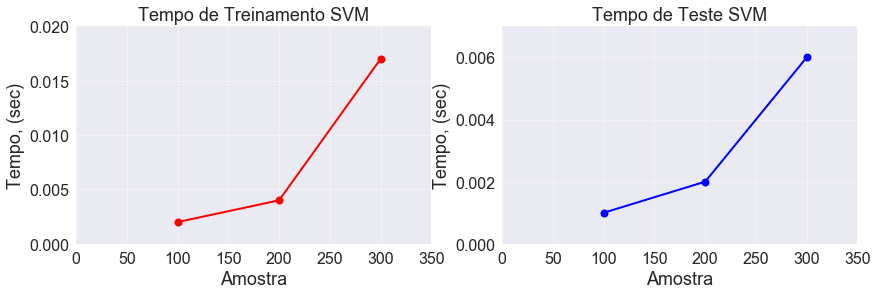


                             GRÁFICO 01                                             GRÁFICO 02 


In [32]:
print ('Estimativa de tempo para treino e teste')

x_samples = [100,200,300]
y_training_time = [.002,.004,.017]
y_prediction_time = [.001,.002,.006]

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(x_samples, y_training_time, 'ro-')
plt.grid(True, linestyle=':')
plt.xlim(0,350)
plt.ylim(0,.02)
plt.title('Tempo de Treinamento SVM')
plt.xlabel('Amostra')
plt.ylabel('Tempo, (sec)')

plt.subplot(1,2,2)
plt.plot(x_samples, y_prediction_time, 'bo-')
plt.grid(True, linestyle=':')
plt.xlim(0,350)
plt.ylim(0,.007)
plt.title('Tempo de Teste SVM')
plt.xlabel('Amostra')
plt.ylabel('Tempo, (sec)')

plt.show()

print ('\n                             GRÁFICO 01                                             GRÁFICO 02 ')

Desempenho do modelo SVM avaliado no parâmetro F1_score


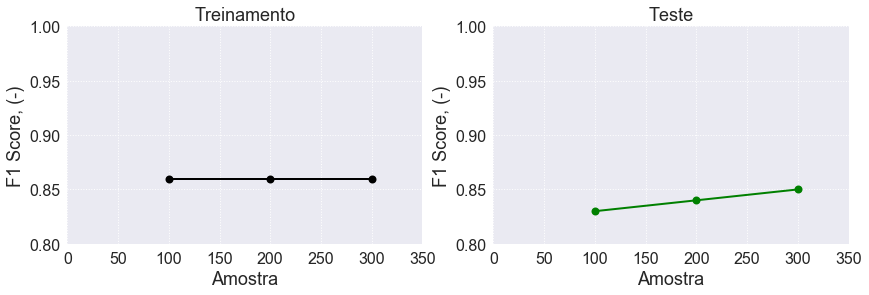


                           GRÁFICO 03                                             GRÁFICO 04 


In [33]:
print ('Desempenho do modelo SVM avaliado no parâmetro F1_score')

x_samples = [100,200,300]
y_training_f1 = [.86,.86,.86]
y_prediction_f1 = [.83,.84,.85]

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(x_samples, y_training_f1, 'ko-')
plt.grid(True, linestyle=':')
plt.xlim(0,350)
plt.ylim(.8,1)
plt.title('Treinamento') 
plt.xlabel('Amostra')
plt.ylabel('F1 Score, (-)')

plt.subplot(1,2,2)
plt.plot(x_samples, y_prediction_f1, 'go-')
plt.grid(True, linestyle=':')
plt.xlim(0,350)
plt.ylim(.8,1)
plt.title('Teste')
plt.xlabel('Amostra')
plt.ylabel('F1 Score, (-)')

plt.show()
print ('\n                           GRÁFICO 03                                             GRÁFICO 04 ')

## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

**Resposta: **

Baseado nos dados e em testes preliminares o melhor modelo é o *"Support Vector Machine"* com 300 pontos para treino do modelo. 

Ao repararmos as pontuações vemos que os modelos de *"Decision Tree"* foram perfeitamente treinados com um *"F1 Score"* igual a 1,00. Contudo, falha ao entrarmos nos dados de teste com um *"F1 Score"* máximo de 0,75. Já *"KNeighborsClassifier"* apresentou uma pontuação baixa tanto no treino quanto no teste dos dados em relação ao modelo escolhido.O modelo *"Support Vector Machine"* apresentou valores da pontuação consistentes para os dados de teste e treinamento, evidenciando uma baixa tendência a memorizar os dados e sim, generalizar o problema de intervenção dos estudantes.

Em relação ao custo computacional para os modelos, vemos que para o treinamento dos dados, *"Decision Tree"* apresentou um valor baixo para o tempo de treino e teste, mas não apresenta um bom *"Trade-off"* interessante em relação ao *"F1 Score"*. Com isso, *"Support Vector Machine"* e *"KNeighborsClassifier"* tem valores próximos para os tempo de teste e treino. Assim, pelos valores de desempenho do modelo, SVM será o melhor modelo a ser utilizado.

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: **

O melhor modelo para o problema de intervenção em alunos que estão prestes a serem reprovados é o *"Support Vector Machine (SVM)"*.

O *"Support Vector Machine (SVM)"* toma como entrada um conjunto de dados e prediz, para cada entrada dada, qual de duas possíveis classes a entrada faz parte. 

Dado um conjunto de treinamento (conjunto de informações que utilizaremos para ajustar o modelo), cada um marcado como pertencente a uma categoria, um algoritmo de treinamento do *SVM* então classifica esses exemplos já separados por categoria e os imagina em "lados" como "sim/não", "pode/não pode" com isso os dados são mapeados de maneira que o conjunto de dados de treinamento sejam divididos por um espaço claro (ou lados claros) que seja tão amplo quanto possível. 

Após esse teste com os dados de treinamento, novos novos exemplos (conjunto de testes que são o conjunto de informações para testarmos o modelo elaborado) são então mapeados no mesmo espaço e preditos como pertencentes a uma categoria baseados em qual o lado do espaço eles são colocados. Esses lados do espaço podem ser **necessita intervenção** ou **não necessita intervençaõ** como no nosso problema.

### Implementação: Calibrando o Modelo (_Tuning_)
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [17]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Crie a lista de parâmetros que você gostaria de calibrar
mapa_parametros = [{
         'C': [0.01, 1, 3, 5, 100],
         'kernel': ['rbf', 'linear'],
         'gamma': ['auto',1, 10, 5],
         'degree': [1,2,3]
          }]

# TODO: Inicialize o classificador
clf = SVC()

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 

def f1_score_teste(estimator, x, y):
    y_pred = estimator.predict(X_test)
    return f1_score(y_test.values, y_pred, pos_label='yes')

    
# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
grid_obj = GridSearchCV(clf, mapa_parametros, scoring=f1_score_teste)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj.fit(X_train, y_train)
grid_obj.best_params_
# Get the estimator
clf = grid_obj.best_estimator_
print('Os melhores parâmetros para o problema são:')
print (grid_obj.best_params_)
print('\n')
print (grid_obj.best_estimator_)
print('\n')

# Reporte a pontuação final F1 para treinamento e teste
print "O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(time_predict_train["f1_score"])
print "O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(time_predict_test["f1_score"])
print('\n')
print "O modelo calibrado tem F Beta de {:.4f} no conjunto de treinamento.".format(time_predict_train["fbeta_score"])
print "O modelo calibrado tem F Beta {:.4f} no conjunto de teste.".format(time_predict_test["fbeta_score"])


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Os melhores parâmetros para o problema são:
{'kernel': 'rbf', 'C': 1, 'gamma': 'auto', 'degree': 1}


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


O modelo calibrado tem F1 de 0.8558 no conjunto de treinamento.
O modelo calibrado tem F1 de 0.7681 no conjunto de teste.


O modelo calibrado tem F Beta de 0.7847 no conjunto de treinamento.
O modelo calibrado tem F Beta 0.6513 no conjunto de teste.


### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: **

A pontuação F1 final para teste é de *F1 = 0,86* e para treinamento *F1 = 0,77*. É abaixo do esperado para o modelo não calibrado que obteve um *F1 = 0,85*, mas ainda sim a pontuação final para o modelo é satisfatória.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.